# This is My First Jupyter Notebook

This notebook was created by **3hs.email@gmail.com** using:
1. Python 3 and was run inside a Pipenv virtual environment.
2. `jupyter` to create my IPYNB file.
3. Added a MD cell, PY3 cell

In [37]:
print("Hello World! 👋🏼 This is the output of a PY3 cell")

Hello World! 👋🏼 This is the output of a PY3 cell


# Calling a Quotes API

Let's understand further how this works.
Below is a PY3 cell calling an API.
I had to disable CERT verification.

In [38]:
import requests
import urllib3

# Supress CERT warning
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

response = requests.get("https://api.quotable.io/random", verify=False)
data = response.json()

print("📝 Random Quote:")
print(f"\"{data['content']}\" — {data['author']}")

📝 Random Quote:
"Wisdom often times consists of knowing what to do next." — Herbert Hoover


# Callin Reservations API

Created a Python API: /reservations_ipynb/  
This API will return a list of reservation in a week.  
I will create a graph showing QTY of reservatinos per day in one week.


In [39]:
import requests
import pandas as pd
from IPython.display import display

response = requests.get("http://localhost:8000/reservations_ipynb/")
if response.status_code == 200:
    data = response.json()
    print(f"✅ {len(data)} reservations loaded.")

    # Flatten into a DataFrame
    flat_data = [
        {"id": item["pk"], **item["fields"]}
        for item in data
    ]
    df = pd.DataFrame(flat_data)
    
    # Show table
    display(df)
else:
    print(f"❌ Error: {response.status_code}")

✅ 38 reservations loaded.


,id,first_name,reservation_date,reservation_slot
0,1,John Doe,2025-07-21,10
1,2,Jane Doe,2025-07-21,13
2,3,Jane Doe,2025-07-22,16
3,4,John Doe,2025-07-22,18
4,5,Jess Doe,2025-07-22,10
5,6,Jess Doe,2025-07-23,15
6,7,John Doe,2025-07-23,14
7,8,Jane Doe,2025-07-23,17
8,9,Pat Doe,2025-07-23,16
9,10,Pat Doe,2025-07-24,10


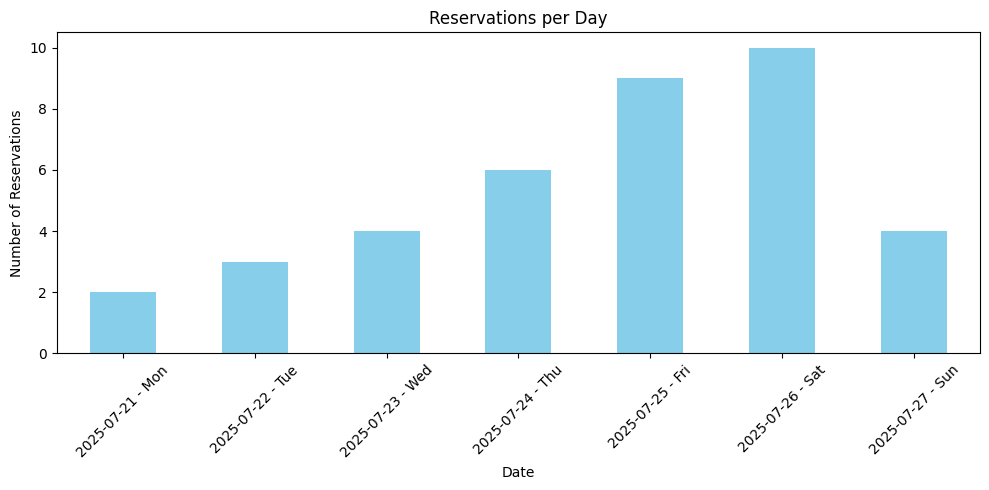

In [40]:
import matplotlib.pyplot as plt

# Group by reservation_date and count
reservations_by_day = df.groupby("reservation_date").size()

# Convert index to DatetimeIndex (if not already)
reservations_by_day.index = pd.to_datetime(reservations_by_day.index)
formatted_index = reservations_by_day.index.strftime("%Y-%m-%d - %a")
reservations_by_day.index = formatted_index

# Plot
plt.figure(figsize=(10, 5))
reservations_by_day.plot(kind="bar", color="skyblue")
plt.title("Reservations per Day")
plt.xlabel("Date")
plt.ylabel("Number of Reservations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()